# Real or Not? NLP with Disaster Tweets
Predict which Tweets are about real disasters and which ones are not

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
# Load data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
# Missing data: 0.8% keywords and 33.3% location
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
# Plot bar graph with occurrence
def plot_bar_graph(df, ncolumn):
    vcount = df[ncolumn].value_counts()
    vcount = vcount[:20,]
    plt.figure(figsize=(10,5))
    g = sns.barplot(vcount.index, vcount.values, alpha=0.8)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(ncolumn, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

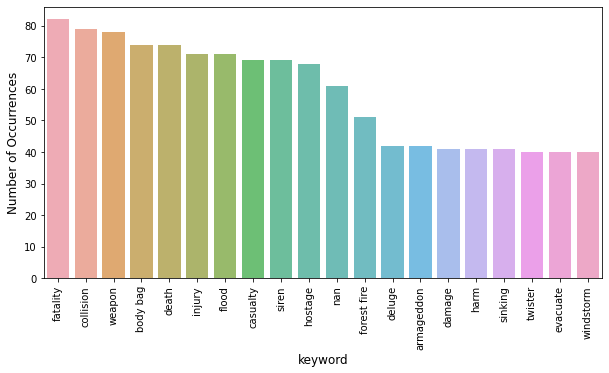

In [5]:
def clean_keywords(df):
    lemmatizer = WordNetLemmatizer()
    for i, row in df.iterrows():
        k = str(row.keyword)
        k = k.split("%20")
        for j, w in enumerate(k):
            k[j] = lemmatizer.lemmatize(w)
            if w == 'collided':
                k[j] = 'collision'
        df.at[i,'keyword'] = ' '.join(k)

clean_keywords(train)
plot_bar_graph(train, "keyword")


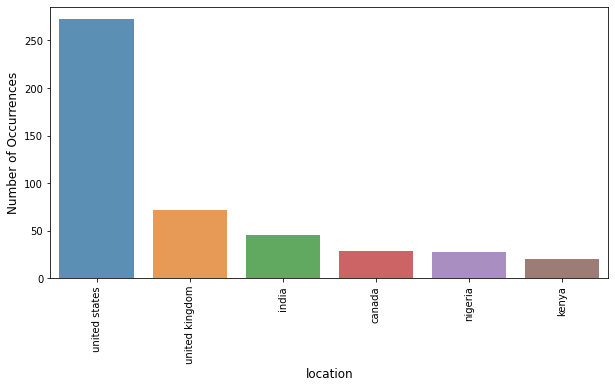

In [6]:
def clean_location(df, vcounts):
    ww = ['everywhere', 'earth', 'world', 'worldwide', 'global', 'planet earth', ]
    us = ['usa', 'new york', 'united states', 'los angeles', 'washington', 'chicago', 'california', 'florida', 'nyc', 'san francisco', 'seattle', 'sacramento', 'new york city', 'texas', 'atlanta', 'san diego', 'us', 'nashville', 'denver', 'dallas', 'houston', 'memphis', 'austin', 'pennsylvania', 'tennessee','orlando', 'portland', 'colorado', 'paterson', 'charlotte', 'oklahoma city', 'brooklyn', 'wisconsin', 'southern california', 'massachusetts', 'ny', 'boston', 'cleveland', 'new jersey', 'ashville', 'indiana', 'philadelphia', 'las vegas', 'north carolina', 'san jose', 'kansas city', 'maryland', 'michigan', 'miami', 'virginia', 'oakland', 'oregon', 'madison', 'phoenix', 'tampa', 'new orleans']
    uk = ['london', 'uk', 'manchester', 'scotland', 'leeds', 'coventry', 'england', 'birmingham', 'newcastle', 'glasgow']
    ind = ['mumbai', 'new delhi']
    cn = ['toronto', 'calgary', 'vancouver']
    aus = ['sydney', 'melbourne']
    jp = ['morioh']
    ng = ['lagos']
    nan = ['ss', '304', 'road to the billionaires club', 'pedophile hunting ground', 'in the word of god', 'nan']
    kn = ['nairobi']
    for i, row in df.iterrows():
        l = str(row.location).rstrip().lstrip().lower().split(",")[0]
        if l in us:
            df.at[i,'location'] = 'united states'  
        elif l in uk:
            df.at[i,'location'] = 'united kingdom'  
        elif l in ind:
            df.at[i,'location'] = 'india' 
        elif l in cn:
            df.at[i,'location'] = 'canada' 
        elif l in ww:
            df.at[i,'location'] = 'worldwide'  
        elif l in aus:
            df.at[i,'location'] = 'australia'
        elif l in jp:
            df.at[i,'location'] = 'japan'
        elif l in ng:
            df.at[i,'location'] = 'nigeria'
        elif l in kn:
            df.at[i,'location'] = 'kenya'
        elif l in nan or '?' in l:
            df.at[i,'location'] = np.nan
        else:
            df.at[i,'location'] = l

        # Remove all location that occur less than 20 times
        if row.location in vcounts and vcounts[row.location] < 20:
            df.at[i,'location'] = np.nan

clean_location(train, train['location'].value_counts())
plot_bar_graph(train, 'location')